---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# el primer paràmetro es la cantidad de corridas o intentos 
# y la segunda la probabilidad de que salga el uno o el otro, 
# en este caso el 50%
# Nota: Por teoría valores < P (en este caso 0.5) se consideran valores
# de éxito es resto son de fracaso
numero_exitos = np.random.binomial(1, 0.5)
# el resultado de ejecutar la funcion es la cantidad de éxitos
numero_exitos

1

In [3]:

# Otro EJEMPLO Se lanza un dado diez veces y se cuenta el número 
# X de que la cara que caiga sea la #3 (3 puntos en el dado) 
# (o cualquier número de 1-6) obtenidos:
# El resultado es la cantidad de que saliera x número 
np.random.binomial(10, 1/6)
# Ejemplo 2: Se lanza un dado diez veces y se cuenta el número X 
# de que salga un número par
# Cómo los posibles valores son 2-4-6 (6 opciones en dados) entonces 
# la probabilidad sería 3/6 (es decir el 50%) donde 3 
# hace referencia a que salga
# 2-4-6 y 6 el set completo de valores
np.random.binomial(10, 3/6)

# El siguiente ejemplo solo divide el numero que resulta entre 0-1000 y lo divide en 1000, 
# Pero entienda que la respuesta lo que dice es que existe una probabilidad del 50% de que salga valores >= 0.5xx (heads o cabeceras) y otro 50% de qie salga
# valores < 0.5 (tail o los registros considerados cola) , se conoce como que el 
# si el segundo valor fuera 0,9 entiendo que existe una probabilidad del 10% de que salga 
# un valor >= 900 y <=1000 y un 
# 90% < 900 >=0
#np.random.binomial(1000, 0.9)
np.random.binomial(1000, 0.5)/1000

0.475

In [4]:
# probabilidad de que caiga un tornado el dìa de hoy
chance_of_tornado = 0.01/100

cantidad_de_tornados = np.random.binomial(100000, chance_of_tornado)
# Entiendo así: De 100000 intentos de tornados la
# variable cantidad_de_tornados =  los que realmente van a caer :S
cantidad_de_tornados

10

In [5]:
# SAMPLING DISTRIBUTION::::::::::::

# digamos que la probabilidad de caer un tornado es del 1% 
# sin importar el día :) 
chance_of_tornado = 0.01

#cantidad de tornados dada la probabilidad (chance_of_tornado)
# El tercer paràmetro = 1000000 es el tamaño de la muestra, en este caso casi 3000 años 
# AL ser  entonces se retornarà un array con los posibles valores en cada posiciòn despuès de aplicar la funciòn 
# ejemplo np.random.binomial(1, 0.1,7) ..el resultado serà [0, 0, 0, 0, 0, 1, 0]
tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)

# Probabilidad de que pase dos días seguidos, inicia en cero
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    # si existiò en los ultimos 3000 años dos dìas en los cuales hubo un tornada cada dìa entonces sumamos a
    # two_days_in_a_row para llevar el conteo de los tornados consecutivos 
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

# Tornados consecutivos
print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

93 tornadoes back to back in 2739.72602739726 years


# More Distribution..

# Binomial vs continuos values:
- Continuos(uniform distributions): Los valores no se categorizan como tail o head (x porcentaje es un set y x% es el otro set), binomial si lo mes

# Normal(gaussian) Distribution or Bell Curve:
- Conceptos.
- Mean Value: El mean value de lanzar un dado 3 veces y que salga 1-2-6 es 3 (aunque el video diga 4.5 min 1.29) , ya que (1+2+6)/3
- Expected Value: Es la promedio de corridas randómicas, en este caso sería el promedio(mean value) de lanzamientos infinitos de un dado en este caso daría 3.5 porque 1+2+3+4+...+6 = 21  =>  21/6 = 3.5. ejemplo cuando hay pesos https://www.varsitytutors.com/hotmath/hotmath_help/topics/expected-value
- Variance: que tantos valores basura se propagan en la media(mean)
- Standar deviation: mide que tan diferente cada valor de nuestro ejemplo es de la media

In [6]:
np.random.uniform(0, 1)

0.09918223026209816

In [7]:
np.random.normal(0.75)

2.4424343406521722

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [8]:
# VECTOR DE 1000 MUESTRAS
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0247596232358767

In [9]:
np.std(distribution)

1.0247596232358767

In [10]:
# forma de la cola de la distribucion si es negativo quiere decir que la curva es más plana de lo contrario 
# quiere decir que la curva es más peaky
import scipy.stats as stats
stats.kurtosis(distribution)

-0.21252959918018588

In [11]:
# es donde cambia la curvatura
stats.skew(distribution)

0.05733040305876713

In [12]:
# Chi sqr distribution tiene un solo parámetro llamado grados de libertad y está muy relacionado con el némro de ejemplos que 
# se tomen, al incrementar el grado de libertad la forma del chi-sqrt cambia (el skew disminuye)
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9277806343836181

In [13]:
# evidencie lo anterior cambiando los grados de libertad a 5 
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.3072069594256923

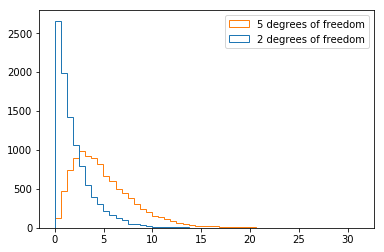

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Modality
- Gaussian Mixture Model: 
    -Bimodal Distribution: 2 distribuciones normales con paráteros  diferentes que muestra dos puntos máximos (dos campanas de gauss) 
    por lo regular pasa en minería de datos 

# Hypothesis Testing in python
- Una hipotesis es una declaracion que deseamos probar
- Se crea la hipotesis alterna(nuestra idea) y la hipotesis nula (alternativa a nuestra idea) y lo que se hace es examinar los datos para determinar si la Hipótesis nula es True or False. No vamos a decir que la nuestra es Verdad desde un principio sino que hay evidencia que la Hipótests nula no aplica :) (sutileza)

In [15]:
df = pd.read_csv('grades.csv')

In [16]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [17]:
# menos de 3000 registros en el archivo
len(df)

2315

In [18]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [19]:
# Note como al aplicar mean() pandas sabe que a las columnas que NO SON números no se los aplica y evidencie como
# si se los aplica a las columnasnuméricas:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [20]:
# Note como los valores son casi identicos antes de 2015-12-31 y después
# Salen ideas como será que las asignaciones están bien propuestas hay algo que no deja que pasen el assigment 6 ??
# será que la gente inicia motivada y luego se aburren por algo? 
# ....sorprendeme :) 
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

# Alpha / Critical Value alpha  (α):
- Es un umbral que indica cuanto vamos a aceptar de 
- Para problemas que no son de física por lo regular el alfa va de 1% a 5%
    para este caso usaremos 5%

In [21]:
from scipy import stats
# T test o prueba T es una forma de comparar los valores promedios de dos sets de datos diferentes 
stats.ttest_ind?

In [22]:
# Dtetectamos si el pValue es mayor a o no a nuestro alfa, en este caso da > 0.05, si es mayor entonces NO PODEMOS 
# RECHAZAR LA HIPOTESIS NULA
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [23]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [24]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)